In [ ]:
from keras.preprocessing.text import Tokenizer

In [ ]:
samples = ['The cat sat on the mat.', 'The dog ate my homework.']

In [ ]:
tokenizer = Tokenizer(num_words=10)
tokenizer_Char = Tokenizer(num_words=10, char_level=True)

In [ ]:
tokenizer.fit_on_texts(samples)
tokenizer_Char.fit_on_texts(samples)

In [ ]:
sequences = tokenizer.texts_to_sequences(samples)
sequences2 = tokenizer_Char.texts_to_sequences(samples)

In [ ]:
sequences

[[1, 2, 3, 4, 1, 5], [1, 6, 7, 8, 9]]

In [ ]:
sequences2

[[2, 4, 3, 1, 9, 5, 2, 1, 5, 2, 1, 6, 1, 2, 4, 3, 1, 7, 5, 2, 8],
 [2, 4, 3, 1, 6, 1, 5, 2, 3, 1, 7, 1, 4, 6, 7, 3, 6, 8]]

In [ ]:
one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')
one_hot_results2 = tokenizer_Char.texts_to_matrix(samples, mode='binary')

In [ ]:
one_hot_results[0]

array([0., 1., 1., 1., 1., 1., 0., 0., 0., 0.])

In [ ]:
one_hot_results[1]

array([0., 1., 0., 0., 0., 0., 1., 1., 1., 1.])

In [ ]:
word_index = tokenizer.word_index
word_index2 = tokenizer_Char.word_index

In [ ]:
word_index

{'the': 1,
 'cat': 2,
 'sat': 3,
 'on': 4,
 'mat': 5,
 'dog': 6,
 'ate': 7,
 'my': 8,
 'homework': 9}

In [ ]:
word_index2

{' ': 1,
 't': 2,
 'e': 3,
 'h': 4,
 'a': 5,
 'o': 6,
 'm': 7,
 '.': 8,
 'c': 9,
 's': 10,
 'n': 11,
 'd': 12,
 'g': 13,
 'y': 14,
 'w': 15,
 'r': 16,
 'k': 17}


## Prédiction des sentiments des critiques de films sur IMDB 

### Chargement du IMDB dataset

In [ ]:
from keras.datasets import imdb

In [ ]:
from keras.utils import pad_sequences

In [ ]:
max_features = 10000
maxlen = 20

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

In [ ]:
x_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [ ]:
y_train[0]

1

In [ ]:
#limiter les séquences en 20 éléments
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [ ]:
x_train.shape

(25000, 20)

###  Utilisation d'une couche Embedding

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

In [ ]:
model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 8)             80000     
                                                                 
 flatten (Flatten)           (None, 160)               0         
                                                                 
 dense (Dense)               (None, 1)                 161       
                                                                 
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x_train, y_train,
                    epochs=10,batch_size=32,
                    validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 1s 1ms/step - loss: 0.6721 - acc: 0.6125 - val_loss: 0.6252 - val_acc: 0.6950
Epoch 2/10
625/625 [==============================] - 1s 1ms/step - loss: 0.5472 - acc: 0.7494 - val_loss: 0.5313 - val_acc: 0.7286
Epoch 3/10
625/625 [==============================] - 1s 1ms/step - loss: 0.4643 - acc: 0.7883 - val_loss: 0.5030 - val_acc: 0.7428
Epoch 4/10
625/625 [==============================] - 1s 1ms/step - loss: 0.4240 - acc: 0.8072 - val_loss: 0.4955 - val_acc: 0.7462
Epoch 5/10
625/625 [==============================] - 1s 1ms/step - loss: 0.3959 - acc: 0.8236 - val_loss: 0.4950 - val_acc: 0.7514
Epoch 6/10
625/625 [==============================] - 1s 1ms/step - loss: 0.3730 - acc: 0.8364 - val_loss: 0.4985 - val_acc: 0.7498
Epoch 7/10
625/625 [==============================] - 1s 1ms/step - loss: 0.3526 - acc: 0.8479 - val_loss: 0.5023 - val_acc: 0.7524
Epoch 8/10
625/625 [==============================] - 1s 1ms/step - loss: 0.

## Word embeddings préentrainés

### Préétraitement des données originales IMDB 

#### http://ai.stanford.edu/~amaas/data/sentiment/

In [ ]:
import os
imdb_dir = '/Users/B.Mehdi/Desktop/Cours/aclImdb'
train_dir = '/Users/B.Mehdi/Desktop/Cours/aclImdb/train'
labels = []
texts = []

#l'enregistrement du texte et des cibles du dataset sur des listes
for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding="utf8")
            texts.append(f.read())
            f.close()
        if label_type == 'neg':
            labels.append(0)
        else:
            labels.append(1)

In [ ]:
texts[0]

"Story of a man who has unnatural feelings for a pig. Starts out with a opening scene that is a terrific example of absurd comedy. A formal orchestra audience is turned into an insane, violent mob by the crazy chantings of it's singers. Unfortunately it stays absurd the WHOLE time with no general narrative eventually making it just too off putting. Even those from the era should be turned off. The cryptic dialogue would make Shakespeare seem easy to a third grader. On a technical level it's better than you might think with some good cinematography by future great Vilmos Zsigmond. Future stars Sally Kirkland and Frederic Forrest can be seen briefly."

In [ ]:
labels[0]

0

### Tokenization du texte original du IMDB dataset

In [ ]:
import numpy as np

In [ ]:
maxlen = 1000 
max_words = 10000

#la division du texte en mots 
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
#la transformation du texte en des séquences numériques
sequences = tokenizer.texts_to_sequences(texts)
#la création d’un dictionnaire liant chaque mot avec un indice unique
word_index = tokenizer.word_index

word_index

{'the': 1,
 'and': 2,
 'a': 3,
 'of': 4,
 'to': 5,
 'is': 6,
 'br': 7,
 'in': 8,
 'it': 9,
 'i': 10,
 'this': 11,
 'that': 12,
 'was': 13,
 'as': 14,
 'for': 15,
 'with': 16,
 'movie': 17,
 'but': 18,
 'film': 19,
 'on': 20,
 'not': 21,
 'you': 22,
 'are': 23,
 'his': 24,
 'have': 25,
 'he': 26,
 'be': 27,
 'one': 28,
 'all': 29,
 'at': 30,
 'by': 31,
 'an': 32,
 'they': 33,
 'who': 34,
 'so': 35,
 'from': 36,
 'like': 37,
 'her': 38,
 'or': 39,
 'just': 40,
 'about': 41,
 "it's": 42,
 'out': 43,
 'has': 44,
 'if': 45,
 'some': 46,
 'there': 47,
 'what': 48,
 'good': 49,
 'more': 50,
 'when': 51,
 'very': 52,
 'up': 53,
 'no': 54,
 'time': 55,
 'she': 56,
 'even': 57,
 'my': 58,
 'would': 59,
 'which': 60,
 'only': 61,
 'story': 62,
 'really': 63,
 'see': 64,
 'their': 65,
 'had': 66,
 'can': 67,
 'were': 68,
 'me': 69,
 'well': 70,
 'than': 71,
 'we': 72,
 'much': 73,
 'been': 74,
 'bad': 75,
 'get': 76,
 'will': 77,
 'do': 78,
 'also': 79,
 'into': 80,
 'people': 81,
 'other': 82,
 '

In [ ]:
data = pad_sequences(sequences, maxlen=maxlen)
labels = np.asarray(labels)

In [ ]:
data.shape

(25000, 500)

In [ ]:
labels.shape

(25000,)

In [ ]:
#réorganisation des éléments du jeu de données dans un ordre aléatoire
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

"""x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]"""

#division des données pour l’apprentissage et la validation
x_trainB = data[:20000]
y_trainB = labels[:20000]
x_valB = data[20000: 25000]
y_valB = labels[20000: 25000]

###  GloVe word embeddings

#### glove.6B.zip :

####  https://nlp.stanford.edu/projects/glove/

In [ ]:
#création d’un dictionnaire contenant les mots de GloVe et leurs coefficients
glove_dir = '/Users/B.Mehdi/Desktop/Cours/glove.6B'
embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'),encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

In [ ]:
embeddings_index['the']

array([-0.038194, -0.24487 ,  0.72812 , -0.39961 ,  0.083172,  0.043953,
       -0.39141 ,  0.3344  , -0.57545 ,  0.087459,  0.28787 , -0.06731 ,
        0.30906 , -0.26384 , -0.13231 , -0.20757 ,  0.33395 , -0.33848 ,
       -0.31743 , -0.48336 ,  0.1464  , -0.37304 ,  0.34577 ,  0.052041,
        0.44946 , -0.46971 ,  0.02628 , -0.54155 , -0.15518 , -0.14107 ,
       -0.039722,  0.28277 ,  0.14393 ,  0.23464 , -0.31021 ,  0.086173,
        0.20397 ,  0.52624 ,  0.17164 , -0.082378, -0.71787 , -0.41531 ,
        0.20335 , -0.12763 ,  0.41367 ,  0.55187 ,  0.57908 , -0.33477 ,
       -0.36559 , -0.54857 , -0.062892,  0.26584 ,  0.30205 ,  0.99775 ,
       -0.80481 , -3.0243  ,  0.01254 , -0.36942 ,  2.2167  ,  0.72201 ,
       -0.24978 ,  0.92136 ,  0.034514,  0.46745 ,  1.1079  , -0.19358 ,
       -0.074575,  0.23353 , -0.052062, -0.22044 ,  0.057162, -0.15806 ,
       -0.30798 , -0.41625 ,  0.37972 ,  0.15006 , -0.53212 , -0.2055  ,
       -1.2526  ,  0.071624,  0.70565 ,  0.49744 , 

### Préparation de la matrice des GloVe word embeddings 

In [ ]:
#création d’une matrice des poids contenant juste les coefficients des mots du jeu de données
embedding_dim = 100
embedding_matrix = np.zeros((max_words, embedding_dim))
#pour chaque mot dans le dictionnaire du dataset, on ajoute ces coefficients dans la matrice des poids
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [ ]:
embedding_matrix.shape

(10000, 100)

### Construction du réseau

In [ ]:
modelB = Sequential()
modelB.add(Embedding(max_words, embedding_dim, input_length=maxlen))
modelB.add(Flatten())
modelB.add(Dense(32, activation='relu'))
modelB.add(Dense(1, activation='sigmoid'))
modelB.summary()

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_14 (Embedding)    (None, 1000, 100)         1000000   
                                                                 
 flatten_6 (Flatten)         (None, 100000)            0         
                                                                 
 dense_31 (Dense)            (None, 32)                3200032   
                                                                 
 dense_32 (Dense)            (None, 1)                 33        
                                                                 
Total params: 4,200,065
Trainable params: 4,200,065
Non-trainable params: 0
_________________________________________________________________


### Initialisation des poids de la couche Embedding par la matrics GloVe

In [ ]:
modelB.layers[0].set_weights([embedding_matrix])
modelB.layers[0].trainable = False

### L'apprentissage et la validation du modèle

In [ ]:
modelB.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

historyB = modelB.fit(x_trainB, y_trainB,
                    epochs=10,batch_size=32,
                    validation_data=(x_valB, y_valB))

Epoch 1/10
625/625 [==============================] - 23s 36ms/step - loss: 0.6832 - acc: 0.5989 - val_loss: 0.6261 - val_acc: 0.6788
Epoch 2/10
625/625 [==============================] - 22s 35ms/step - loss: 0.5566 - acc: 0.7347 - val_loss: 0.5729 - val_acc: 0.6988
Epoch 3/10
625/625 [==============================] - 21s 33ms/step - loss: 0.4322 - acc: 0.8071 - val_loss: 0.5423 - val_acc: 0.7328
Epoch 4/10
625/625 [==============================] - 21s 34ms/step - loss: 0.3342 - acc: 0.8618 - val_loss: 0.5915 - val_acc: 0.7410
Epoch 5/10
625/625 [==============================] - 21s 34ms/step - loss: 0.2600 - acc: 0.8928 - val_loss: 0.6866 - val_acc: 0.7324
Epoch 6/10
625/625 [==============================] - 22s 35ms/step - loss: 0.2033 - acc: 0.9165 - val_loss: 0.7493 - val_acc: 0.7326
Epoch 7/10
625/625 [==============================] - 22s 35ms/step - loss: 0.1594 - acc: 0.9384 - val_loss: 0.9261 - val_acc: 0.7204
Epoch 8/10
625/625 [==============================] - 21s 34ms

### Utilisation du SimpleRNN 

In [ ]:
model2 = Sequential()
model2.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model2.add(SimpleRNN(32))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model2.summary()

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_15 (Embedding)    (None, 1000, 100)         1000000   
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, 32)                4256      
                                                                 
 dense_33 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,004,289
Trainable params: 1,004,289
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.layers[0].set_weights([embedding_matrix])
model2.layers[0].trainable = False
model2.summary()

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_15 (Embedding)    (None, 1000, 100)         1000000   
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, 32)                4256      
                                                                 
 dense_33 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,004,289
Trainable params: 4,289
Non-trainable params: 1,000,000
_________________________________________________________________


In [ ]:
history2 = model2.fit(x_trainB, y_trainB,
                    epochs=10,batch_size=32,
                    validation_data=(x_valB, y_valB))

Epoch 1/10
625/625 [==============================] - 102s 161ms/step - loss: 0.6486 - acc: 0.6101 - val_loss: 0.5481 - val_acc: 0.7264
Epoch 2/10
625/625 [==============================] - 101s 162ms/step - loss: 0.5328 - acc: 0.7411 - val_loss: 0.5486 - val_acc: 0.7316
Epoch 3/10
625/625 [==============================] - 101s 161ms/step - loss: 0.4892 - acc: 0.7715 - val_loss: 0.4665 - val_acc: 0.7988
Epoch 4/10
625/625 [==============================] - 100s 159ms/step - loss: 0.4602 - acc: 0.7926 - val_loss: 0.5742 - val_acc: 0.6996
Epoch 5/10
625/625 [==============================] - 98s 157ms/step - loss: 0.4228 - acc: 0.8153 - val_loss: 0.4430 - val_acc: 0.8138
Epoch 6/10
625/625 [==============================] - 97s 156ms/step - loss: 0.4045 - acc: 0.8249 - val_loss: 0.5172 - val_acc: 0.7742
Epoch 7/10
625/625 [==============================] - 98s 157ms/step - loss: 0.3851 - acc: 0.8363 - val_loss: 0.4392 - val_acc: 0.8192
Epoch 8/10
625/625 [==============================]

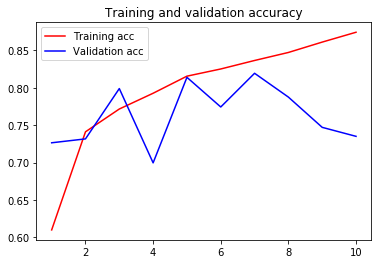

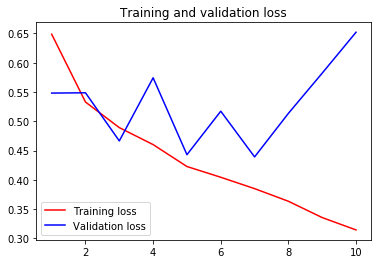

In [ ]:
acc = history2.history['acc']
val_acc = history2.history['val_acc']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

#### Dimunition de la longueur des séquences, et l'utilisation de notre prope Embedding layer

In [ ]:
max_features = 10000
maxlen = 500

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [ ]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x_train, y_train,
                    epochs=10,batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 10s 61ms/step - loss: 0.6444 - acc: 0.6116 - val_loss: 0.4800 - val_acc: 0.8102
Epoch 2/10
157/157 [==============================] - 9s 60ms/step - loss: 0.4051 - acc: 0.8288 - val_loss: 0.4004 - val_acc: 0.8294
Epoch 3/10
157/157 [==============================] - 9s 60ms/step - loss: 0.2876 - acc: 0.8866 - val_loss: 0.4577 - val_acc: 0.7900
Epoch 4/10
157/157 [==============================] - 9s 60ms/step - loss: 0.2228 - acc: 0.9135 - val_loss: 0.4264 - val_acc: 0.8448
Epoch 5/10
157/157 [==============================] - 9s 61ms/step - loss: 0.1857 - acc: 0.9287 - val_loss: 0.3925 - val_acc: 0.8486
Epoch 6/10
157/157 [==============================] - 10s 62ms/step - loss: 0.1267 - acc: 0.9549 - val_loss: 0.4137 - val_acc: 0.8450
Epoch 7/10
157/157 [==============================] - 10s 61ms/step - loss: 0.0829 - acc: 0.9733 - val_loss: 0.4849 - val_acc: 0.8234
Epoch 8/10
157/157 [==============================] - 10s 61ms/ste

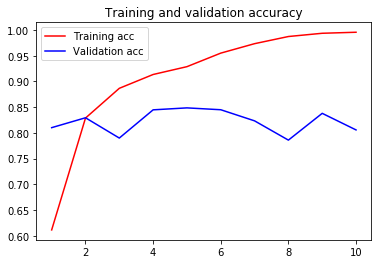

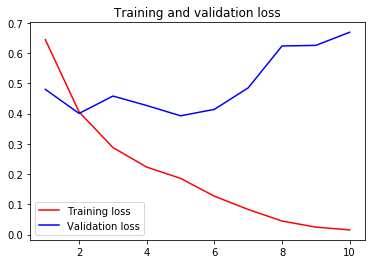

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Utilisation du LSTM 

In [ ]:
from keras.layers import LSTM 

In [ ]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(x_train, y_train, epochs=10,
                    batch_size=128,validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 25s 148ms/step - loss: 0.5103 - acc: 0.7596 - val_loss: 0.4013 - val_acc: 0.8324
Epoch 2/10
157/157 [==============================] - 22s 142ms/step - loss: 0.3002 - acc: 0.8844 - val_loss: 0.3219 - val_acc: 0.8616
Epoch 3/10
157/157 [==============================] - 22s 142ms/step - loss: 0.2342 - acc: 0.9103 - val_loss: 0.3092 - val_acc: 0.8836
Epoch 4/10
157/157 [==============================] - 22s 142ms/step - loss: 0.1991 - acc: 0.9269 - val_loss: 0.2752 - val_acc: 0.8928
Epoch 5/10
157/157 [==============================] - 22s 142ms/step - loss: 0.1774 - acc: 0.9354 - val_loss: 0.2865 - val_acc: 0.8878
Epoch 6/10
157/157 [==============================] - 22s 143ms/step - loss: 0.1560 - acc: 0.9451 - val_loss: 0.3328 - val_acc: 0.8650
Epoch 7/10
157/157 [==============================] - 22s 143ms/step - loss: 0.1445 - acc: 0.9497 - val_loss: 0.3109 - val_acc: 0.8818
Epoch 8/10
157/157 [==============================] - 2

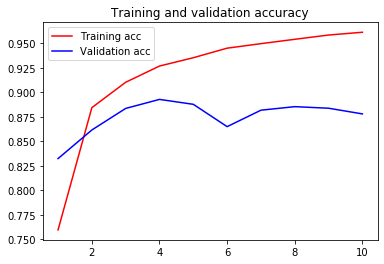

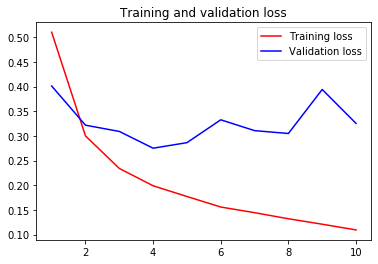

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Problème de prédiction de la température

### The Jena weather dataset

#### https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip 

### Examination des données 

In [ ]:
data_dir = '/Users/B.Mehdi/Desktop/Cours/jena_climate'
fname = os.path.join(data_dir, 'jena_climate_2009_2016.csv')

In [ ]:
f = open(fname)
data = f.read()
f.close()

lines = data.split('\n')
header = lines[0].split(',')
lines = lines[1:]

header

['"Date Time"',
 '"p (mbar)"',
 '"T (degC)"',
 '"Tpot (K)"',
 '"Tdew (degC)"',
 '"rh (%)"',
 '"VPmax (mbar)"',
 '"VPact (mbar)"',
 '"VPdef (mbar)"',
 '"sh (g/kg)"',
 '"H2OC (mmol/mol)"',
 '"rho (g/m**3)"',
 '"wv (m/s)"',
 '"max. wv (m/s)"',
 '"wd (deg)"']

In [ ]:
len(lines)

420451

### Transformation des données en Numpy array 

In [ ]:
float_data = np.zeros((len(lines), len(header) - 1))
for i, line in enumerate(lines):
    values = [float(x) for x in line.split(',')[1:]]
    float_data[i, :] = values

###   La courbe d'évolution de la température  

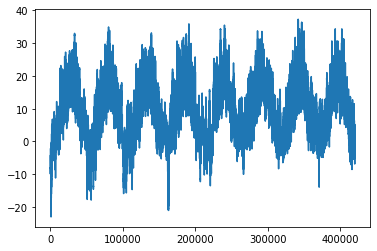

In [ ]:
temp = float_data[:, 1]
plt.plot(range(len(temp)), temp)

### Normalisation du dataset 

In [ ]:
mean = float_data[:200000].mean(axis=0)
std = float_data[:200000].std(axis=0)
float_data -= mean
float_data /= std

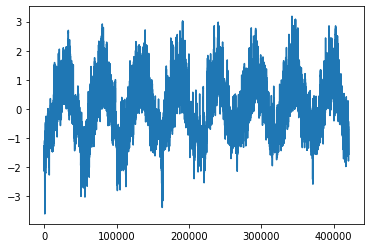

In [ ]:
temp = float_data[:, 1]
plt.plot(range(len(temp)), temp)

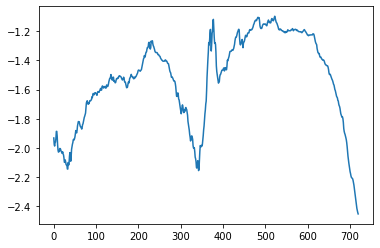

In [ ]:
plt.plot(range(720), temp[:720])

#### Création d'un générateur de données

In [ ]:
def generator(data, lookback, delay, min_index, max_index,
              shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback # i définit le dernier indice à utiliser pour le lot
    
    while 1:
        if shuffle:
            #crée 128 indices aléatoires entre min_index+lookback et max_index
            rows = np.random.randint(min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            #création de 128 indices aléatoires entre min_index+lookback et max_index
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)
        #initialisation d’un tenseur avec des zéros, sous la forme (128, 120, 14)
        samples = np.zeros((len(rows),lookback // step,data.shape[-1]))
        #initialisation d’un tenseur avec des zéros, sous la forme (128,)
        targets = np.zeros((len(rows),))
        #une boucle sur tous les indices dans la liste rows
        for j, row in enumerate(rows):
            #pour chaque indice dans rows, la fonction range crée une liste des entiers entre rows[j]-lookback et rows[j] séparer par un pas de 6, par exemple range(1, 10, 2) = [1,3,5,7,9]
            indices = range(rows[j] - lookback, rows[j], step)
            #tirer les indices créés du dataset
            samples[j] = data[indices]
            #tirer de la température à prédire
            targets[j] = data[rows[j] + delay][1]
        yield samples, targets

In [ ]:
lookback = 720 #nombre de jours à utiliser pour la prédiction, 720 signifie 5 jours (144 points de données par jour)
step = 6 #pour définir la fréquence par laquelle on utilise les données, 6 signifie un point de données chaque heure (les données sont enregistrées chaque 10 minutes)
delay = 144 #la durée après le dernier point utilisé, pour tirer la cible à prédire, 144 = 24 heures
batch_size = 128 #la taille des lots tirés des données
train_gen = generator(float_data,lookback=lookback,
                      delay=delay,min_index=0,
                      max_index=200000,shuffle=True,
                      step=step,batch_size=batch_size)

val_gen = generator(float_data,lookback=lookback,
                    delay=delay,min_index=200001,
                    max_index=300000,step=step,
                    batch_size=batch_size)

test_gen = generator(float_data,lookback=lookback,
                     delay=delay,min_index=300001,
                     max_index=None,step=step,
                     batch_size=batch_size)

val_steps = (300000 - 200001 - lookback) // batch_size
test_steps = (len(float_data) - 300001 - lookback) // batch_size

### Entrainement et validation d'un réseau dense

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(lookback // step, float_data.shape[-1])))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='rmsprop', loss='mae')

history = model.fit(train_gen,steps_per_epoch=500,
                              epochs=20,validation_data=val_gen,
                              validation_steps=val_steps)

Epoch 1/20
500/500 [==============================] - 6s 12ms/step - loss: 0.8615 - val_loss: 0.5255
Epoch 2/20
500/500 [==============================] - 6s 12ms/step - loss: 0.3669 - val_loss: 0.3124
Epoch 3/20
500/500 [==============================] - 6s 11ms/step - loss: 0.2929 - val_loss: 0.2822
Epoch 4/20
500/500 [==============================] - 6s 11ms/step - loss: 0.2737 - val_loss: 0.2915
Epoch 5/20
500/500 [==============================] - 6s 11ms/step - loss: 0.2647 - val_loss: 0.2995
Epoch 6/20
500/500 [==============================] - 6s 12ms/step - loss: 0.2571 - val_loss: 0.2996
Epoch 7/20
500/500 [==============================] - 6s 12ms/step - loss: 0.2516 - val_loss: 0.2959
Epoch 8/20
500/500 [==============================] - 6s 12ms/step - loss: 0.2485 - val_loss: 0.2895
Epoch 9/20
500/500 [==============================] - 6s 11ms/step - loss: 0.2431 - val_loss: 0.2963
Epoch 10/20
500/500 [==============================] - 6s 11ms/step - loss: 0.2407 - val_lo

In [ ]:
std[1]*0.2822

2.4981752409981417

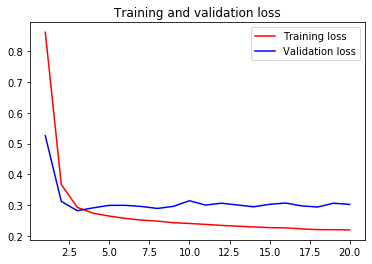

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Entrainement et validation d'un réseau GRU

In [ ]:
from keras.layers import GRU, Dropout

In [ ]:
model = Sequential()
model.add(GRU(32, input_shape=(None, float_data.shape[-1])))
model.add(Dense(1))

model.compile(optimizer='rmsprop', loss='mae')

history = model.fit(train_gen,steps_per_epoch=500,
                              epochs=20,validation_data=val_gen,
                              validation_steps=val_steps)

Epoch 1/20
500/500 [==============================] - 23s 43ms/step - loss: 0.3034 - val_loss: 0.2736
Epoch 2/20
500/500 [==============================] - 21s 42ms/step - loss: 0.2837 - val_loss: 0.2677
Epoch 3/20
500/500 [==============================] - 21s 42ms/step - loss: 0.2798 - val_loss: 0.2779
Epoch 4/20
500/500 [==============================] - 21s 43ms/step - loss: 0.2767 - val_loss: 0.2623
Epoch 5/20
500/500 [==============================] - 21s 43ms/step - loss: 0.2702 - val_loss: 0.2658
Epoch 6/20
500/500 [==============================] - 21s 43ms/step - loss: 0.2667 - val_loss: 0.2788
Epoch 7/20
500/500 [==============================] - 22s 43ms/step - loss: 0.2610 - val_loss: 0.2670
Epoch 8/20
500/500 [==============================] - 22s 43ms/step - loss: 0.2582 - val_loss: 0.2644
Epoch 9/20
500/500 [==============================] - 22s 43ms/step - loss: 0.2537 - val_loss: 0.2684
Epoch 10/20
500/500 [==============================] - 22s 43ms/step - loss: 0.249

In [ ]:
std[1]*0.2623

2.32201050926227

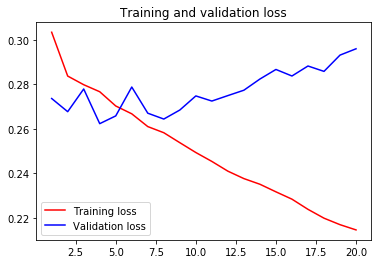

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Entrainement et validation d'un réseau GRU avec du dropout

In [ ]:
model = Sequential()
model.add(GRU(32, recurrent_dropout=0.25,input_shape=(None, float_data.shape[-1])))
model.add(Dropout(0.5))
model.add(Dense(1))

In [ ]:
model.compile(optimizer='rmsprop', loss='mae')

history = model.fit(train_gen,steps_per_epoch=500,
                              epochs=40,validation_data=val_gen,
                              validation_steps=val_steps)

Epoch 1/40
500/500 [==============================] - 32s 61ms/step - loss: 0.3759 - val_loss: 0.2808
Epoch 2/40
500/500 [==============================] - 31s 62ms/step - loss: 0.3322 - val_loss: 0.2762
Epoch 3/40
500/500 [==============================] - 31s 62ms/step - loss: 0.3272 - val_loss: 0.2758
Epoch 4/40
500/500 [==============================] - 31s 61ms/step - loss: 0.3247 - val_loss: 0.2714
Epoch 5/40
500/500 [==============================] - 31s 63ms/step - loss: 0.3219 - val_loss: 0.2704
Epoch 6/40
500/500 [==============================] - 31s 63ms/step - loss: 0.3208 - val_loss: 0.2689
Epoch 7/40
500/500 [==============================] - 30s 60ms/step - loss: 0.3202 - val_loss: 0.2682
Epoch 8/40
500/500 [==============================] - 29s 58ms/step - loss: 0.3188 - val_loss: 0.2738
Epoch 9/40
500/500 [==============================] - 29s 59ms/step - loss: 0.3168 - val_loss: 0.2660
Epoch 10/40
500/500 [==============================] - 30s 60ms/step - loss: 0.315

In [ ]:
std[1]*0.2635

2.3326335081609155

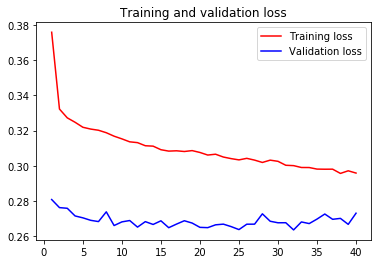

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Entrainement et validation d'un réseau GRU de deux couches

In [ ]:
model = Sequential()
model.add(GRU(32,recurrent_dropout=0.5, return_sequences=True, input_shape=(None, float_data.shape[-1])))
model.add(GRU(32, recurrent_dropout=0.5))
model.add(Dropout(0.5))
model.add(Dense(1))

model.compile(optimizer='rmsprop', loss='mae')

history = model.fit(train_gen,steps_per_epoch=500,
                    epochs=40,validation_data=val_gen,
                    validation_steps=val_steps)

Epoch 1/40
500/500 [==============================] - 62s 118ms/step - loss: 0.3555 - val_loss: 0.2827
Epoch 2/40
500/500 [==============================] - 60s 120ms/step - loss: 0.3296 - val_loss: 0.2773
Epoch 3/40
500/500 [==============================] - 61s 122ms/step - loss: 0.3244 - val_loss: 0.2688
Epoch 4/40
500/500 [==============================] - 61s 122ms/step - loss: 0.3208 - val_loss: 0.2695
Epoch 5/40
500/500 [==============================] - 63s 126ms/step - loss: 0.3173 - val_loss: 0.2687
Epoch 6/40
500/500 [==============================] - 63s 126ms/step - loss: 0.3135 - val_loss: 0.2633
Epoch 7/40
500/500 [==============================] - 62s 124ms/step - loss: 0.3121 - val_loss: 0.2627
Epoch 8/40
500/500 [==============================] - 62s 124ms/step - loss: 0.3105 - val_loss: 0.2667
Epoch 9/40
500/500 [==============================] - 62s 125ms/step - loss: 0.3107 - val_loss: 0.2613
Epoch 10/40
500/500 [==============================] - 61s 123ms/step - l

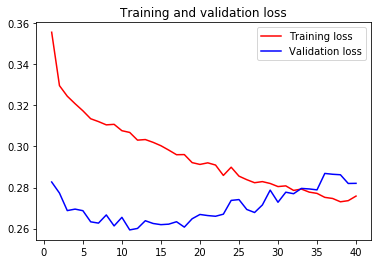

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
std[1]*0.2594

2.296338261923877

### Entrainement et validation d'un réseau GRU bidirectionnel

In [ ]:
from keras import layers

In [ ]:
model = Sequential()
model.add(layers.Bidirectional(layers.GRU(32,recurrent_dropout = 0.5),
                               input_shape=(None,float_data.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer='rmsprop', loss='mae')

history = model.fit(train_gen,steps_per_epoch=500,
                              epochs=40,validation_data=val_gen,
                              validation_steps=val_steps)

Epoch 1/40
500/500 [==============================] - 41s 77ms/step - loss: 0.3051 - val_loss: 0.2733
Epoch 2/40
500/500 [==============================] - 38s 77ms/step - loss: 0.2824 - val_loss: 0.2703
Epoch 3/40
500/500 [==============================] - 39s 78ms/step - loss: 0.2777 - val_loss: 0.2692
Epoch 4/40
500/500 [==============================] - 39s 78ms/step - loss: 0.2731 - val_loss: 0.2770
Epoch 5/40
500/500 [==============================] - 39s 79ms/step - loss: 0.2690 - val_loss: 0.2695
Epoch 6/40
500/500 [==============================] - 39s 78ms/step - loss: 0.2652 - val_loss: 0.2660
Epoch 7/40
500/500 [==============================] - 40s 80ms/step - loss: 0.2612 - val_loss: 0.2709
Epoch 8/40
500/500 [==============================] - 40s 80ms/step - loss: 0.2584 - val_loss: 0.2681
Epoch 9/40
500/500 [==============================] - 40s 80ms/step - loss: 0.2546 - val_loss: 0.2669
Epoch 10/40
500/500 [==============================] - 40s 80ms/step - loss: 0.251

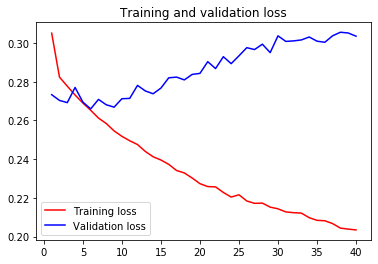

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Entrainement et validation d'un réseau LSTM bidirectionnel sur IMDB dataset

In [ ]:
max_features = 10000
maxlen = 500
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [ ]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(layers.Bidirectional(LSTM(32)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy', metrics=['acc'])

history = model.fit(x_train, y_train, epochs=10,
                    batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 68s 414ms/step - loss: 0.5192 - acc: 0.7447 - val_loss: 0.3990 - val_acc: 0.8368
Epoch 2/10
157/157 [==============================] - 65s 411ms/step - loss: 0.3044 - acc: 0.8805 - val_loss: 0.3908 - val_acc: 0.8662
Epoch 3/10
157/157 [==============================] - 66s 419ms/step - loss: 0.2383 - acc: 0.9100 - val_loss: 0.3036 - val_acc: 0.8808
Epoch 4/10
157/157 [==============================] - 67s 425ms/step - loss: 0.2048 - acc: 0.9258 - val_loss: 0.2855 - val_acc: 0.8804
Epoch 5/10
157/157 [==============================] - 66s 419ms/step - loss: 0.1822 - acc: 0.9327 - val_loss: 0.3409 - val_acc: 0.8780
Epoch 6/10
157/157 [==============================] - 65s 413ms/step - loss: 0.1623 - acc: 0.9427 - val_loss: 0.3065 - val_acc: 0.8732
Epoch 7/10
157/157 [==============================] - 65s 412ms/step - loss: 0.1477 - acc: 0.9488 - val_loss: 0.4147 - val_acc: 0.8644
Epoch 8/10
157/157 [==============================] - 6

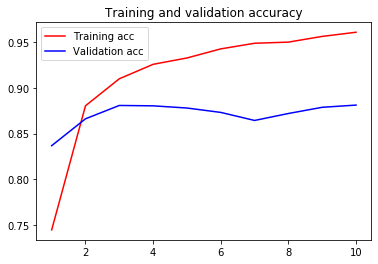

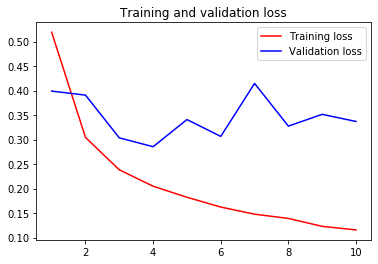

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
modelD = Sequential()
modelD.add(Embedding(max_features, 32))
modelD.add(layers.Bidirectional(LSTM(32, recurrent_dropout=0.5)))
modelD.add(Dense(1, activation='sigmoid'))

modelD.compile(optimizer='rmsprop',
              loss='binary_crossentropy', metrics=['acc'])

historyD = modelD.fit(x_train, y_train, epochs=10,
                    batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 179s 1s/step - loss: 0.5347 - acc: 0.7462 - val_loss: 0.3799 - val_acc: 0.8424
Epoch 2/10
157/157 [==============================] - 176s 1s/step - loss: 0.3185 - acc: 0.8737 - val_loss: 0.6853 - val_acc: 0.8010
Epoch 3/10
157/157 [==============================] - 176s 1s/step - loss: 0.2560 - acc: 0.9039 - val_loss: 0.4255 - val_acc: 0.8384
Epoch 4/10
157/157 [==============================] - 177s 1s/step - loss: 0.2247 - acc: 0.9184 - val_loss: 0.3001 - val_acc: 0.8718
Epoch 5/10
157/157 [==============================] - 175s 1s/step - loss: 0.2017 - acc: 0.9297 - val_loss: 0.4817 - val_acc: 0.8620
Epoch 6/10
157/157 [==============================] - 177s 1s/step - loss: 0.1752 - acc: 0.9384 - val_loss: 0.3627 - val_acc: 0.8610
Epoch 7/10
157/157 [==============================] - 178s 1s/step - loss: 0.1650 - acc: 0.9418 - val_loss: 0.4288 - val_acc: 0.8684
Epoch 8/10
157/157 [==============================] - 178s 1s/step - 

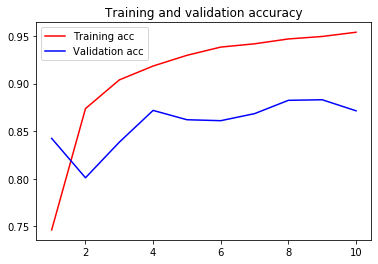

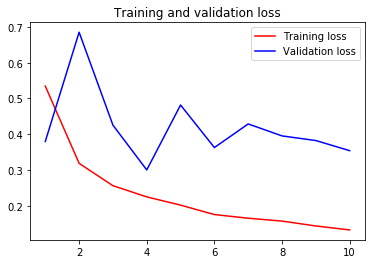

In [ ]:
acc = historyD.history['acc']
val_acc = historyD.history['val_acc']
loss = historyD.history['loss']
val_loss = historyD.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Entrainement et validation d'un réseau de convolution 1D sur IMDB dataset

In [ ]:
model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length=maxlen))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 500, 128)          1280000   
                                                                 
 conv1d (Conv1D)             (None, 494, 32)           28704     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 98, 32)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 92, 32)            7200      
                                                                 
 global_max_pooling1d (Globa  (None, 32)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_21 (Dense)            (None, 1)               

In [ ]:
from keras import optimizers

In [ ]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=1e-4), loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,epochs=10,
                    batch_size=128,validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 27s 169ms/step - loss: 0.6928 - acc: 0.5181 - val_loss: 0.6918 - val_acc: 0.5372
Epoch 2/10
157/157 [==============================] - 27s 173ms/step - loss: 0.6864 - acc: 0.6176 - val_loss: 0.6869 - val_acc: 0.6228
Epoch 3/10
157/157 [==============================] - 27s 171ms/step - loss: 0.6741 - acc: 0.7107 - val_loss: 0.6693 - val_acc: 0.7156
Epoch 4/10
157/157 [==============================] - 27s 173ms/step - loss: 0.6361 - acc: 0.7739 - val_loss: 0.6076 - val_acc: 0.7468
Epoch 5/10
157/157 [==============================] - 27s 171ms/step - loss: 0.5412 - acc: 0.8108 - val_loss: 0.4876 - val_acc: 0.8246
Epoch 6/10
157/157 [==============================] - 27s 172ms/step - loss: 0.4193 - acc: 0.8468 - val_loss: 0.3936 - val_acc: 0.8416
Epoch 7/10
157/157 [==============================] - 26s 166ms/step - loss: 0.3381 - acc: 0.8697 - val_loss: 0.3505 - val_acc: 0.8526
Epoch 8/10
157/157 [==============================] - 2

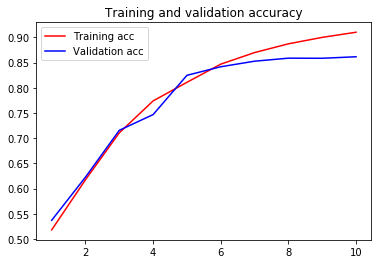

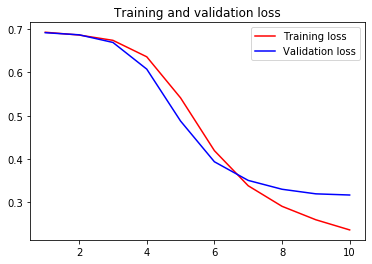

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Entrainement et validation d'un réseau de convolution 1D sur Jena dataset

In [ ]:
model = Sequential()

model.add(layers.Conv1D(32, 5, activation='relu',
                        input_shape=(None, float_data.shape[-1])))
model.add(layers.MaxPooling1D(3))

model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.MaxPooling1D(3))

model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())

model.add(layers.Dense(1))

model.compile(optimizer="rmsprop", loss='mae')

cnn_history = model.fit(train_gen,steps_per_epoch=500,
                                  epochs=20,validation_data=val_gen,
                                  validation_steps=val_steps)

Epoch 1/20
500/500 [==============================] - 11s 21ms/step - loss: 0.3970 - val_loss: 0.4201
Epoch 2/20
500/500 [==============================] - 10s 20ms/step - loss: 0.3284 - val_loss: 0.3908
Epoch 3/20
500/500 [==============================] - 10s 21ms/step - loss: 0.2985 - val_loss: 0.4174
Epoch 4/20
500/500 [==============================] - 11s 21ms/step - loss: 0.2784 - val_loss: 0.3959
Epoch 5/20
500/500 [==============================] - 11s 22ms/step - loss: 0.2633 - val_loss: 0.4117
Epoch 6/20
500/500 [==============================] - 10s 21ms/step - loss: 0.2525 - val_loss: 0.3918
Epoch 7/20
500/500 [==============================] - 10s 21ms/step - loss: 0.2443 - val_loss: 0.4229
Epoch 8/20
500/500 [==============================] - 10s 20ms/step - loss: 0.2355 - val_loss: 0.4070
Epoch 9/20
500/500 [==============================] - 10s 20ms/step - loss: 0.2296 - val_loss: 0.3989
Epoch 10/20
500/500 [==============================] - 10s 20ms/step - loss: 0.224

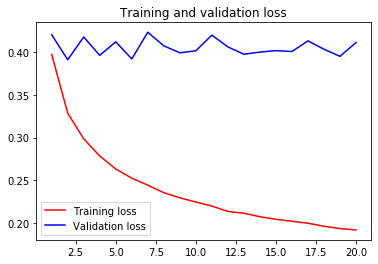

In [ ]:
loss = cnn_history.history['loss']
val_loss = cnn_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Multiplication des données tirées du Jena dataset 

In [ ]:
lookback = 720
step = 3
delay = 144
batch_size = 128
train_gen = generator(float_data,lookback=lookback,
                      delay=delay,min_index=0,
                      max_index=200000,shuffle=True,
                      step=step,batch_size=batch_size)

val_gen = generator(float_data,lookback=lookback,
                    delay=delay,min_index=200001,
                    max_index=300000,step=step,
                    batch_size=batch_size)

test_gen = generator(float_data,lookback=lookback,
                     delay=delay,min_index=300001,
                     max_index=None,step=step,
                     batch_size=batch_size)

val_steps = (300000 - 200001 - lookback) // batch_size
test_steps = (len(float_data) - 300001 - lookback) // batch_size

### Combinaison d'une base de convolution 1D et des réseaux récurrents sur Jena dataset

In [ ]:
model = Sequential()
model.add(layers.Conv1D(32, 5, activation='relu',
                        input_shape=(None, float_data.shape[-1])))
model.add(layers.MaxPooling1D(3))

model.add(layers.Conv1D(32, 5, activation='relu'))

model.add(layers.GRU(32,recurrent_dropout=0.5))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(1))

model.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_5 (Conv1D)           (None, None, 32)          2272      
                                                                 
 max_pooling1d_3 (MaxPooling  (None, None, 32)         0         
 1D)                                                             
                                                                 
 conv1d_6 (Conv1D)           (None, None, 32)          5152      
                                                                 
 gru_18 (GRU)                (None, 32)                6336      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_23 (Dense)            (None, 1)                 33        
                                                     

In [ ]:
model.compile(optimizer='rmsprop', loss='mae')

cnn_rnn_history = model.fit(train_gen, steps_per_epoch=500,
                              epochs=20,validation_data=val_gen,
                              validation_steps=val_steps)

Epoch 1/20
500/500 [==============================] - 46s 89ms/step - loss: 0.3696 - val_loss: 0.2831
Epoch 2/20
500/500 [==============================] - 43s 87ms/step - loss: 0.3329 - val_loss: 0.3003
Epoch 3/20
500/500 [==============================] - 44s 88ms/step - loss: 0.3210 - val_loss: 0.2921
Epoch 4/20
500/500 [==============================] - 44s 89ms/step - loss: 0.3121 - val_loss: 0.2755
Epoch 5/20
500/500 [==============================] - 44s 87ms/step - loss: 0.3060 - val_loss: 0.2689
Epoch 6/20
500/500 [==============================] - 43s 86ms/step - loss: 0.3003 - val_loss: 0.2707
Epoch 7/20
500/500 [==============================] - 44s 89ms/step - loss: 0.2956 - val_loss: 0.2738
Epoch 8/20
500/500 [==============================] - 44s 87ms/step - loss: 0.2912 - val_loss: 0.2766
Epoch 9/20
500/500 [==============================] - 45s 90ms/step - loss: 0.2859 - val_loss: 0.2842
Epoch 10/20
500/500 [==============================] - 44s 87ms/step - loss: 0.281

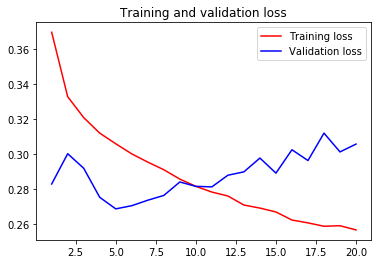

In [ ]:
loss = cnn_rnn_history.history['loss']
val_loss = cnn_rnn_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
model2 = Sequential()
model2.add(layers.Conv1D(32, 5, activation='relu',
                        input_shape=(None, float_data.shape[-1])))
model2.add(layers.MaxPooling1D(3))

model2.add(layers.Conv1D(32, 5, activation='relu'))

model2.add(layers.LSTM(32,recurrent_dropout=0.5, return_sequences = True))
model2.add(layers.LSTM(32,recurrent_dropout=0.5))
model2.add(layers.Dropout(0.5))

model2.add(layers.Dense(1))

model2.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_11 (Conv1D)          (None, None, 32)          2272      
                                                                 
 max_pooling1d_6 (MaxPooling  (None, None, 32)         0         
 1D)                                                             
                                                                 
 conv1d_12 (Conv1D)          (None, None, 32)          5152      
                                                                 
 lstm_4 (LSTM)               (None, None, 32)          8320      
                                                                 
 lstm_5 (LSTM)               (None, 32)                8320      
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                     

In [ ]:
model2.compile(optimizer='rmsprop', loss='mae')

cnn_LSTM_history = model2.fit(train_gen, steps_per_epoch=500,
                              epochs=20,validation_data=val_gen,
                              validation_steps=val_steps)

Epoch 1/20
500/500 [==============================] - 93s 180ms/step - loss: 0.3800 - val_loss: 0.2936
Epoch 2/20
500/500 [==============================] - 90s 180ms/step - loss: 0.3339 - val_loss: 0.2780
Epoch 3/20
500/500 [==============================] - 90s 181ms/step - loss: 0.3171 - val_loss: 0.2811
Epoch 4/20
500/500 [==============================] - 89s 178ms/step - loss: 0.3042 - val_loss: 0.2711
Epoch 5/20
500/500 [==============================] - 89s 178ms/step - loss: 0.2965 - val_loss: 0.2765
Epoch 6/20
500/500 [==============================] - 89s 178ms/step - loss: 0.2865 - val_loss: 0.2898
Epoch 7/20
500/500 [==============================] - 89s 178ms/step - loss: 0.2818 - val_loss: 0.2877
Epoch 8/20
500/500 [==============================] - 89s 178ms/step - loss: 0.2726 - val_loss: 0.2884
Epoch 9/20
500/500 [==============================] - 89s 178ms/step - loss: 0.2674 - val_loss: 0.2962
Epoch 10/20
500/500 [==============================] - 89s 177ms/step - l

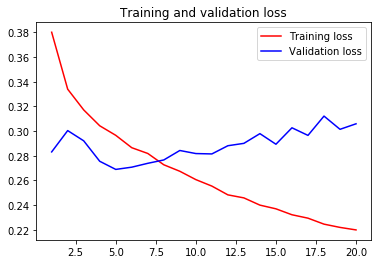

In [ ]:
loss = cnn_LSTM_history.history['loss']
val_loss = cnn_rnn_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()